# **CARBON DIOXIDE EMISSIONS PREDICTION**

## **Import Libraries**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

## **Combine Multiple Datasets**

In [4]:
gdp_per_capita_df = pd.read_csv('/gdp_per_capita.csv')
co2_emission_df = pd.read_csv('/co2_emissions_kt_by_country.csv')

In [5]:
co2_emission_df[(co2_emission_df['country_code'] == 'ABW')]
gdp_per_capita_df[gdp_per_capita_df["Code"] == 'ABW']['2017']

0    29350.805019
Name: 2017, dtype: float64

In [6]:
generalDF = pd.DataFrame()

In [7]:
# Get the list of countries in the GDP per capita table
country_code_list = gdp_per_capita_df['Code'].unique();
country_code_list

array(['ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE',
       'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ',
       'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN',
       'CEB', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG',
       'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR',
       'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST',
       'ETH', 'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB',
       'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC',
       'HRV', 'HTI', 'HUN', 'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX',
       'IMN', 'IND', 'INX', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA',
       'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA',
       'KOR', 'KWT',

**Combine GDP Table with CO2 Emissions Table**

In [8]:
rows = []
for country in country_code_list:
    for year in range(1960, 2017):
        try:
            co2_emission = co2_emission_df[(co2_emission_df['country_code'] == country) & (co2_emission_df['year'] == year)]['value'].iloc[0]
            row = {
                'country_code': country,
                'country_name': gdp_per_capita_df[gdp_per_capita_df['Code'] == country]['Country Name'].iloc[0],
                'year': year,
                'gdp_per_cap': gdp_per_capita_df[gdp_per_capita_df['Code'] == country][str(year)].iloc[0],
                'co2_emission': co2_emission
            }
            rows.append(row)
        except:
            row = {
                'country_code': country,
                'country_name': gdp_per_capita_df[gdp_per_capita_df['Code'] == country]['Country Name'].iloc[0],
                'year': year,
                'gdp_per_cap': gdp_per_capita_df[gdp_per_capita_df['Code'] == country][str(year)].iloc[0],
                'co2_emission': None
            }
            rows.append(row)

generalDF = pd.DataFrame(rows)

In [9]:
generalDF

,country_code,country_name,year,gdp_per_cap,co2_emission
0,ABW,Aruba,1960,NaN,11092.675000
1,ABW,Aruba,1961,NaN,11576.719000
2,ABW,Aruba,1962,NaN,12713.489000
3,ABW,Aruba,1963,NaN,12178.107000
4,ABW,Aruba,1964,NaN,11840.743000
...,...,...,...,...,...
15157,ZWE,Zimbabwe,2012,1304.968011,12010.000229
15158,ZWE,Zimbabwe,2013,1429.998461,12279.999733
15159,ZWE,Zimbabwe,2014,1434.896277,12079.999924
15160,ZWE,Zimbabwe,2015,1445.069702,12430.000305


In [10]:
# Get the population table
population_df = pd.read_csv('/pop.csv')
population_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,UAE,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,...,432k,434k,435k,436k,437k,438k,439k,440k,441k,441k
193,Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,73.2M,73.3M,73.5M,73.6M,73.7M,73.8M,73.9M,74M,74.1M,74.2M
194,South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,...,75.6M,75.5M,75.4M,75.3M,75.2M,75.1M,75M,74.8M,74.7M,74.6M
195,Zambia,747k,758k,770k,782k,794k,806k,818k,831k,843k,...,60.3M,60.7M,61.1M,61.5M,61.9M,62.2M,62.6M,62.9M,63.3M,63.6M


**Convert Country Name Into Country Code**

In [11]:
country_name = {}
for country in country_code_list:
  country_name[gdp_per_capita_df[gdp_per_capita_df['Code'] == country]['Country Name'].iloc[0]] = country

In [12]:
population_df['country_code'] = population_df.apply(lambda row: country_name.get(row['country'], 'Not found'), axis = 1)

**Get Countries That Could Not Be Converted Automatically**

In [13]:
missing_code = population_df[population_df['country_code'] == 'Not found']['country'].values

In [14]:
missing_code

array(['UAE', 'Bahamas', 'Brunei', 'Cape Verde', 'Egypt', 'UK', 'Gambia',
       'Hong Kong, China', 'Holy See', 'Iran', 'South Korea', 'Lao',
       'North Korea', 'Palestine', 'Russia', 'Syria', 'Taiwan', 'USA',
       'Venezuela', 'Yemen'], dtype=object)

In [15]:
# Add the country code manually
code_missing = ['ARE', 'BHS', 'BRN', 'CPV', 'EGY', 'GBR', 'GMB', 'HKG',
                'VAT', 'IRN', 'KOR', 'LAO', 'PRK', 'PSE', 'RUS', 'SYR',
                'TWN', 'USA', 'VEN', 'YEM']

for i in range(len(missing_code)):
  population_df.loc[population_df['country'] == missing_code[i], 'country_code'] = code_missing[i]

In [16]:
generalDF['pop'] = generalDF.apply(lambda row: population_df[(population_df['country_code'] == row['country_code'])][str(row['year'])].iloc[0] if not population_df[(population_df['country_code'] == row['country_code'])][str(row['year'])].empty else None, axis=1)

In [17]:
generalDF

,country_code,country_name,year,gdp_per_cap,co2_emission,pop
0,ABW,Aruba,1960,NaN,11092.675000,None
1,ABW,Aruba,1961,NaN,11576.719000,None
2,ABW,Aruba,1962,NaN,12713.489000,None
3,ABW,Aruba,1963,NaN,12178.107000,None
4,ABW,Aruba,1964,NaN,11840.743000,None
...,...,...,...,...,...,...
15157,ZWE,Zimbabwe,2012,1304.968011,12010.000229,13.3M
15158,ZWE,Zimbabwe,2013,1429.998461,12279.999733,13.6M
15159,ZWE,Zimbabwe,2014,1434.896277,12079.999924,13.9M
15160,ZWE,Zimbabwe,2015,1445.069702,12430.000305,14.2M


**Convert Population in Form M(Millions), k(thousands), B(Bilions) into Numerical Values**

In [18]:
def convert_to_numeric(string):
  try:
    suffixes = {'k': 1e3, 'M': 1e6, 'B': 1e9}
    if string[-1] in suffixes:
      return float(string[:-1]) * suffixes[string[-1]]
    else:
      return float(string)
  except:
    return None

In [19]:
print(convert_to_numeric('3.28M'))

3280000.0


In [20]:
generalDF['pop'] = generalDF['pop'].apply(lambda pop: convert_to_numeric(pop))

In [21]:
generalDF

,country_code,country_name,year,gdp_per_cap,co2_emission,pop
0,ABW,Aruba,1960,NaN,11092.675000,NaN
1,ABW,Aruba,1961,NaN,11576.719000,NaN
2,ABW,Aruba,1962,NaN,12713.489000,NaN
3,ABW,Aruba,1963,NaN,12178.107000,NaN
4,ABW,Aruba,1964,NaN,11840.743000,NaN
...,...,...,...,...,...,...
15157,ZWE,Zimbabwe,2012,1304.968011,12010.000229,13300000.0
15158,ZWE,Zimbabwe,2013,1429.998461,12279.999733,13600000.0
15159,ZWE,Zimbabwe,2014,1434.896277,12079.999924,13900000.0
15160,ZWE,Zimbabwe,2015,1445.069702,12430.000305,14200000.0


**Birth Restriction Policty**

In [22]:
child_restriction_policy = {
    'EGY': {
        'from': 2017,
        'to': 100000,
        'limit': 2
    },
    'CHN': {
        'from': 1979,
        'to': 2015,
        'limit': 1
    },
    'IRN': {
        'from': 1990,
        'to': 2006,
        'limit': 2
    },
    'SGP': {
        'from': 1966,
        'to': 1980,
        'limit': 2
    },
    'VNM': {
        'from': 1988,
        'to': 1000000,
        'limit': 2
    }
}

In [23]:
restriction_lambda = lambda row: child_restriction_policy[row['country_code']]['limit'] if row['country_code'] in child_restriction_policy and child_restriction_policy[row['country_code']]['from'] <= int(row['year']) <= child_restriction_policy[row['country_code']]['to'] else 50

generalDF['restriction_limit'] = generalDF.apply(restriction_lambda, axis=1)

In [24]:
# Drop rows without population values
generalDF = generalDF.dropna(subset=['pop'], how='all', axis=0)

In [25]:
generalDF

,country_code,country_name,year,gdp_per_cap,co2_emission,pop,restriction_limit
114,AFG,Afghanistan,1960,59.773234,414.371000,8620000.0,50
115,AFG,Afghanistan,1961,59.860900,491.378000,8790000.0,50
116,AFG,Afghanistan,1962,58.458009,689.396000,8970000.0,50
117,AFG,Afghanistan,1963,78.706429,707.731000,9160000.0,50
118,AFG,Afghanistan,1964,82.095307,839.743000,9360000.0,50
...,...,...,...,...,...,...,...
15157,ZWE,Zimbabwe,2012,1304.968011,12010.000229,13300000.0,50
15158,ZWE,Zimbabwe,2013,1429.998461,12279.999733,13600000.0,50
15159,ZWE,Zimbabwe,2014,1434.896277,12079.999924,13900000.0,50
15160,ZWE,Zimbabwe,2015,1445.069702,12430.000305,14200000.0,50


## **Classify Countries By Their Income**

In [26]:
country_classification_gdp = pd.read_csv('/country_classification.csv', sep=';')

In [27]:
country_classification_gdp

,Class,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Low / Lower Middle,580,610,635,675,695,725,765,785,785,...,995,1005,1025,1035,1045,1045,1025,1005,995,1026
1,Lower Middle / Upper Middle,2335,2465,2555,2695,2785,2895,3035,3115,3125,...,3945,3975,4035,4085,4125,4125,4035,3955,3895,3995
2,Upper Middle / High,6000,7620,7910,8355,8625,8955,9385,9645,9655,...,12195,12275,12475,12615,12745,12735,12475,12235,12055,12375


In [28]:
# Classify countries by their GDP per capita and year
def classify_country(gdp_per_cap, year):
  try:
    gdp_per_cap = int(gdp_per_cap)
    year = int(year)
  except:
    return 'Unclassified'
  year = max(year, 1989)

  low_lower_middle = int(country_classification_gdp.iloc[0][str(year)])
  lower_middle_upper_middle = int(country_classification_gdp.iloc[1][str(year)])
  upper_middle_high = int(country_classification_gdp.iloc[2][str(year)])

  if (gdp_per_cap <= low_lower_middle):
    return 'Low Income'
  elif (low_lower_middle < gdp_per_cap <= lower_middle_upper_middle):
    return 'Lower Middle Income'
  elif (lower_middle_upper_middle < gdp_per_cap <= upper_middle_high):
    return 'Upper Middle Income'
  else:
    return 'High Income'

In [29]:
generalDF['country_type'] = generalDF.apply(lambda row: classify_country(row['gdp_per_cap'], row['year']), axis=1)

<ipython-input-29-405c6c2bc33b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generalDF['country_type'] = generalDF.apply(lambda row: classify_country(row['gdp_per_cap'], row['year']), axis=1)


In [30]:
generalDF

,country_code,country_name,year,gdp_per_cap,co2_emission,pop,restriction_limit,country_type
114,AFG,Afghanistan,1960,59.773234,414.371000,8620000.0,50,Low Income
115,AFG,Afghanistan,1961,59.860900,491.378000,8790000.0,50,Low Income
116,AFG,Afghanistan,1962,58.458009,689.396000,8970000.0,50,Low Income
117,AFG,Afghanistan,1963,78.706429,707.731000,9160000.0,50,Low Income
118,AFG,Afghanistan,1964,82.095307,839.743000,9360000.0,50,Low Income
...,...,...,...,...,...,...,...,...
15157,ZWE,Zimbabwe,2012,1304.968011,12010.000229,13300000.0,50,Lower Middle Income
15158,ZWE,Zimbabwe,2013,1429.998461,12279.999733,13600000.0,50,Lower Middle Income
15159,ZWE,Zimbabwe,2014,1434.896277,12079.999924,13900000.0,50,Lower Middle Income
15160,ZWE,Zimbabwe,2015,1445.069702,12430.000305,14200000.0,50,Lower Middle Income


### **High Income**

In [31]:
# Only considered who was 'High income' in every year from 1989 to 2016
high_income_countries = None

for year in range(1989, 2017):
    year_df = generalDF[(generalDF['year'] == year) & (generalDF['country_type'] == 'High Income')]
    if high_income_countries is None:
        high_income_countries = set(year_df['country_code'].unique())
    else:
        high_income_countries &= set(year_df['country_code'].unique())

print(high_income_countries)

{'AUT', 'CYP', 'IRL', 'CHE', 'AND', 'LUX', 'QAT', 'FRA', 'BHR', 'HKG', 'DEU', 'ESP', 'SGP', 'NOR', 'FIN', 'ITA', 'USA', 'BHS', 'LIE', 'MCO', 'GBR', 'ISL', 'ARE', 'NLD', 'AUS', 'BRN', 'BEL', 'PRT', 'CAN', 'GRC', 'JPN', 'DNK', 'NZL', 'SWE'}


### **Upper Middle Income**

In [32]:
# Only considered who was 'Upper middle income' in every year from 1989 to 2016
upper_middle_income_countries = None

for year in range(2010, 2017):
    year_df = generalDF[(generalDF['year'] == year) & (generalDF['country_type'] == 'Upper Middle Income')]
    if upper_middle_income_countries is None:
        upper_middle_income_countries = set(year_df['country_code'].unique())
    else:
        upper_middle_income_countries &= set(year_df['country_code'].unique())

print(upper_middle_income_countries)


{'CRI', 'GUY', 'TUR', 'LBN', 'LCA', 'TKM', 'IRQ', 'ZAF', 'DMA', 'THA', 'JAM', 'MEX', 'MYS', 'BLZ', 'CUB', 'MUS', 'MNE', 'SRB', 'COL', 'PRY', 'BLR', 'MDV', 'IRN', 'PER', 'GAB', 'SUR', 'BIH', 'VCT', 'CHN', 'GRD', 'NRU', 'ROU', 'ECU', 'NAM', 'BGR', 'MKD', 'DOM', 'BWA'}


### **Lower Middle Income**

In [33]:
# Only considered who was 'Lower Middle income' in every year from 1989 to 2016
lower_middle_income_countries = None

for year in range(2010, 2017):
    year_df = generalDF[(generalDF['year'] == year) & (generalDF['country_type'] == 'Lower Middle Income')]
    if lower_middle_income_countries is None:
        lower_middle_income_countries = set(year_df['country_code'].unique())
    else:
        lower_middle_income_countries &= set(year_df['country_code'].unique())

print(lower_middle_income_countries)

{'HTI', 'MRT', 'COG', 'COM', 'LAO', 'CIV', 'PNG', 'VNM', 'PSE', 'IND', 'NGA', 'ARM', 'CMR', 'FSM', 'LKA', 'TUV', 'IDN', 'SLB', 'KEN', 'SEN', 'BOL', 'YEM', 'VUT', 'UZB', 'ZMB', 'STP', 'BEN', 'KIR', 'MHL', 'CPV', 'PHL', 'LSO', 'SDN', 'NIC', 'MDA', 'DJI', 'BTN', 'GHA', 'SLV', 'HND', 'EGY', 'MAR'}


### **Low Income**

In [34]:
# Only considered who was 'Low income' in every year from 1989 to 2016
low_income_countries = None

for year in range(1989, 2017):
    year_df = generalDF[(generalDF['year'] == year) & (generalDF['country_type'] == 'Low Income')]
    if low_income_countries is None:
        low_income_countries = set(year_df['country_code'].unique())
    else:
        low_income_countries &= set(year_df['country_code'].unique())

print(low_income_countries)

{'NPL', 'SLE', 'COD', 'UGA', 'NER', 'MLI', 'TGO', 'BDI', 'BFA', 'CAF', 'MDG', 'MWI', 'RWA', 'GNB', 'ETH', 'TZA', 'TCD', 'GIN'}


## **Plot CO2 Emissions By Income Level**

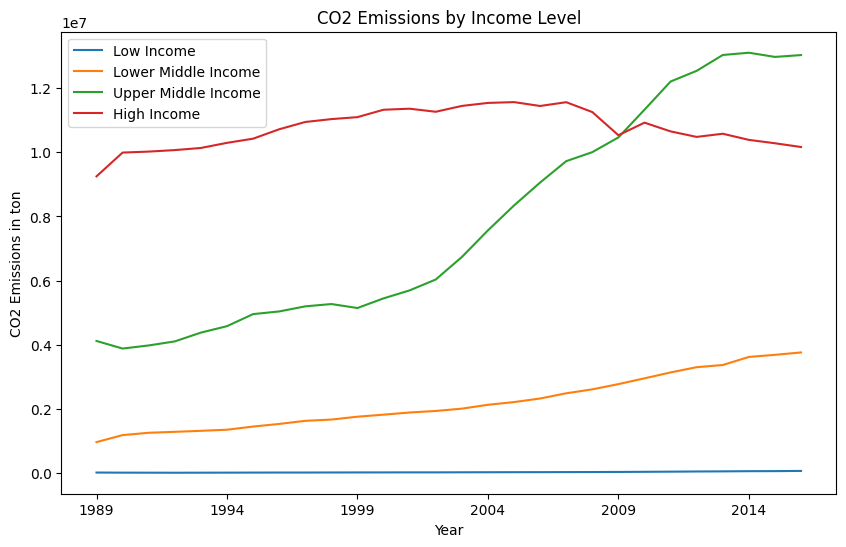

In [35]:
# Create subplots with 1 row and 1 column
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

data_low_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(low_income_countries))]
    co2_emission_sum = filtered_df['co2_emission'].sum()
    data_low_income[str(year)] =  co2_emission_sum

data_lower_middle_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(lower_middle_income_countries))]
    co2_emission_sum = filtered_df['co2_emission'].sum()
    data_lower_middle_income[str(year)] =  co2_emission_sum

data_upper_middle_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(upper_middle_income_countries))]
    co2_emission_sum = filtered_df['co2_emission'].sum()
    data_upper_middle_income[str(year)] =  co2_emission_sum

data_high_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(high_income_countries))]
    co2_emission_sum = filtered_df['co2_emission'].sum()
    data_high_income[str(year)] =  co2_emission_sum

# Plot low income countries
keys = list(data_low_income.keys())
values = list(data_low_income.values())
ax.plot(keys, values, label='Low Income')

# Plot lower middle income countries
keys = list(data_lower_middle_income.keys())
values = list(data_lower_middle_income.values())
ax.plot(keys, values, label='Lower Middle Income')

# Plot upper middle income countries
keys = list(data_upper_middle_income.keys())
values = list(data_upper_middle_income.values())
ax.plot(keys, values, label='Upper Middle Income')

# Plot high income countries
keys = list(data_high_income.keys())
values = list(data_high_income.values())
ax.plot(keys, values, label='High Income')

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Emissions in ton')
tick_positions = range(0, len(keys), 5)
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]
ax.set_xticks(tick_positions, tick_labels)
ax.set_title('CO2 Emissions by Income Level')
ax.legend()
ax.grid(False)

# Show the plot
plt.show()

## **Plot Population By Income Level**

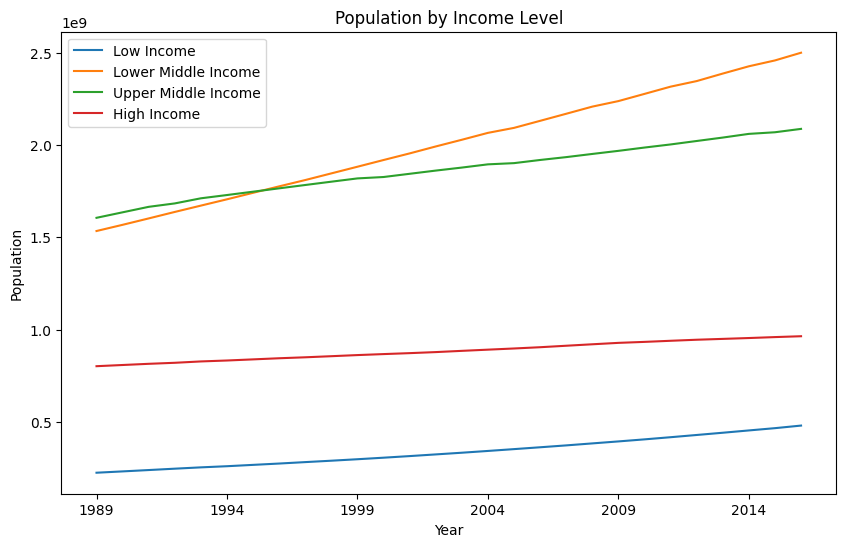

In [36]:
# Create subplots with 1 row and 1 column
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

data_low_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(low_income_countries))]
    pop = filtered_df['pop'].sum()
    data_low_income[str(year)] =  pop

data_lower_middle_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(lower_middle_income_countries ))]
    pop = filtered_df['pop'].sum()
    data_lower_middle_income[str(year)] =  pop

data_upper_middle_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(upper_middle_income_countries))]
    pop = filtered_df['pop'].sum()
    data_upper_middle_income[str(year)] =  pop

data_high_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(high_income_countries))]
    pop = filtered_df['pop'].sum()
    data_high_income[str(year)] =  pop

# Plot low income countries
keys = list(data_low_income.keys())
values = list(data_low_income.values())
ax.plot(keys, values, label='Low Income')

# Plot lower middle income countries
keys = list(data_lower_middle_income.keys())
values = list(data_lower_middle_income.values())
ax.plot(keys, values, label='Lower Middle Income')

# Plot upper middle income countries
keys = list(data_upper_middle_income.keys())
values = list(data_upper_middle_income.values())
ax.plot(keys, values, label='Upper Middle Income')

# Plot high income countries
keys = list(data_high_income.keys())
values = list(data_high_income.values())
ax.plot(keys, values, label='High Income')

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Population')
tick_positions = range(0, len(keys), 5)
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]
ax.set_xticks(tick_positions, tick_labels)
ax.set_title('Population by Income Level')
ax.legend()
ax.grid(False)

# Show the plot
plt.show()

## **CO2 Emissions World Map**

In [37]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
co2 = generalDF[['country_code', 'co2_emission', 'year']]

<ipython-input-37-e3082db78aa7>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


### **1960 World Map**

<Axes: >

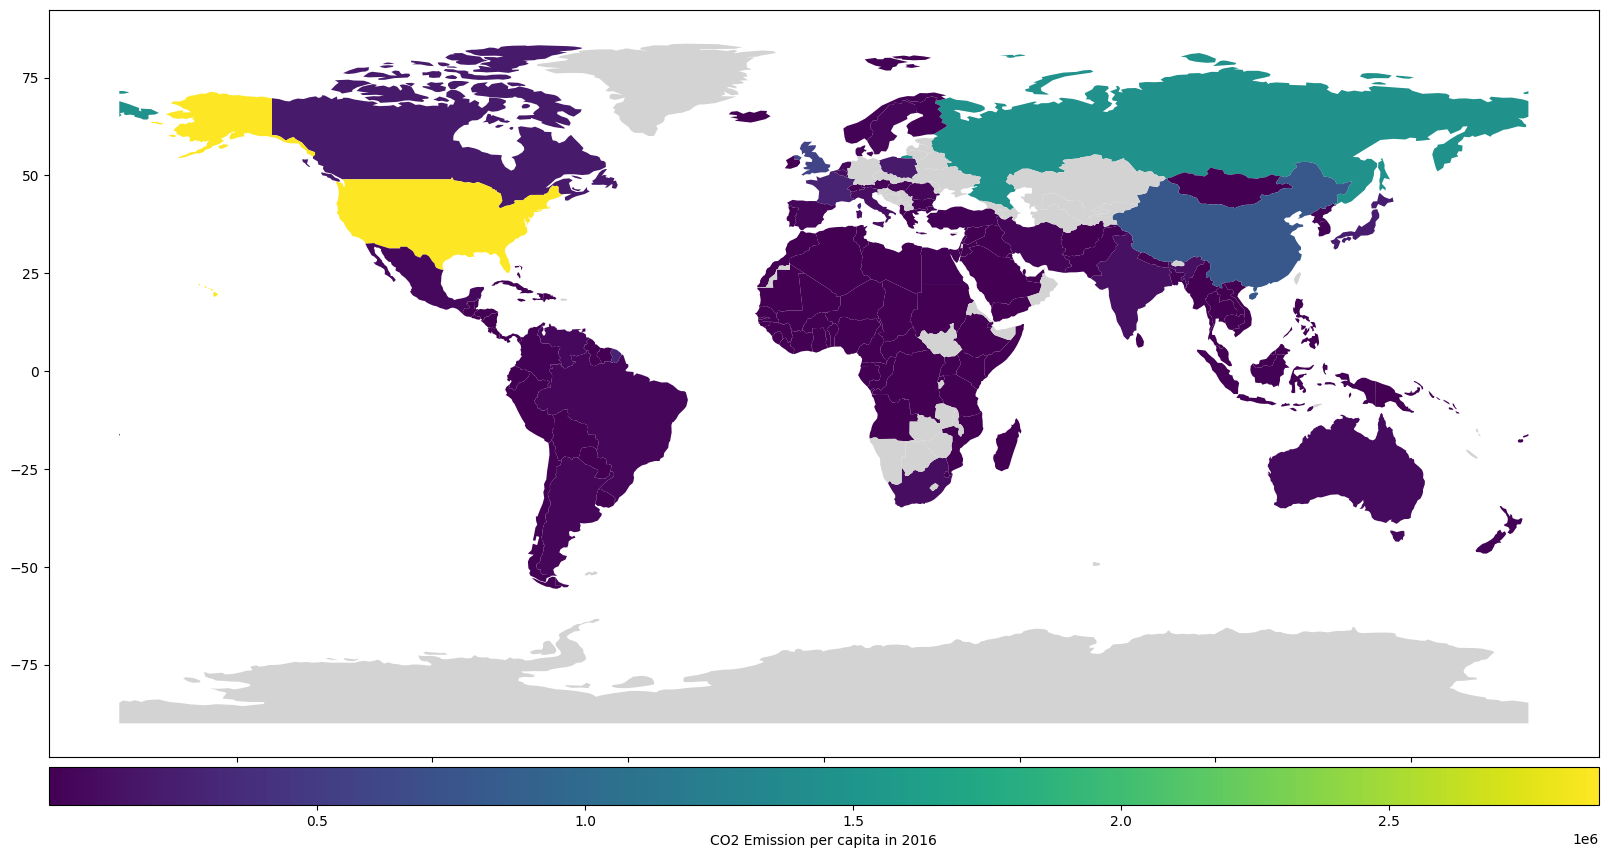

In [38]:
# World map 1960
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.grid(False)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

co2_1960 = generalDF.loc[generalDF["year"] == 1960]
world_1960 = world.merge(co2_1960,left_on='iso_a3',right_on='country_code',how='outer')
world_1960.plot(column='co2_emission',figsize=(20,20), ax=ax, legend=True, cax=cax,
                legend_kwds={'label':"CO2 Emission per capita in 2016", 'orientation':"horizontal"},
                missing_kwds={'color': 'lightgrey'}, cmap = 'viridis')

### **2016 World Map**

<Axes: >

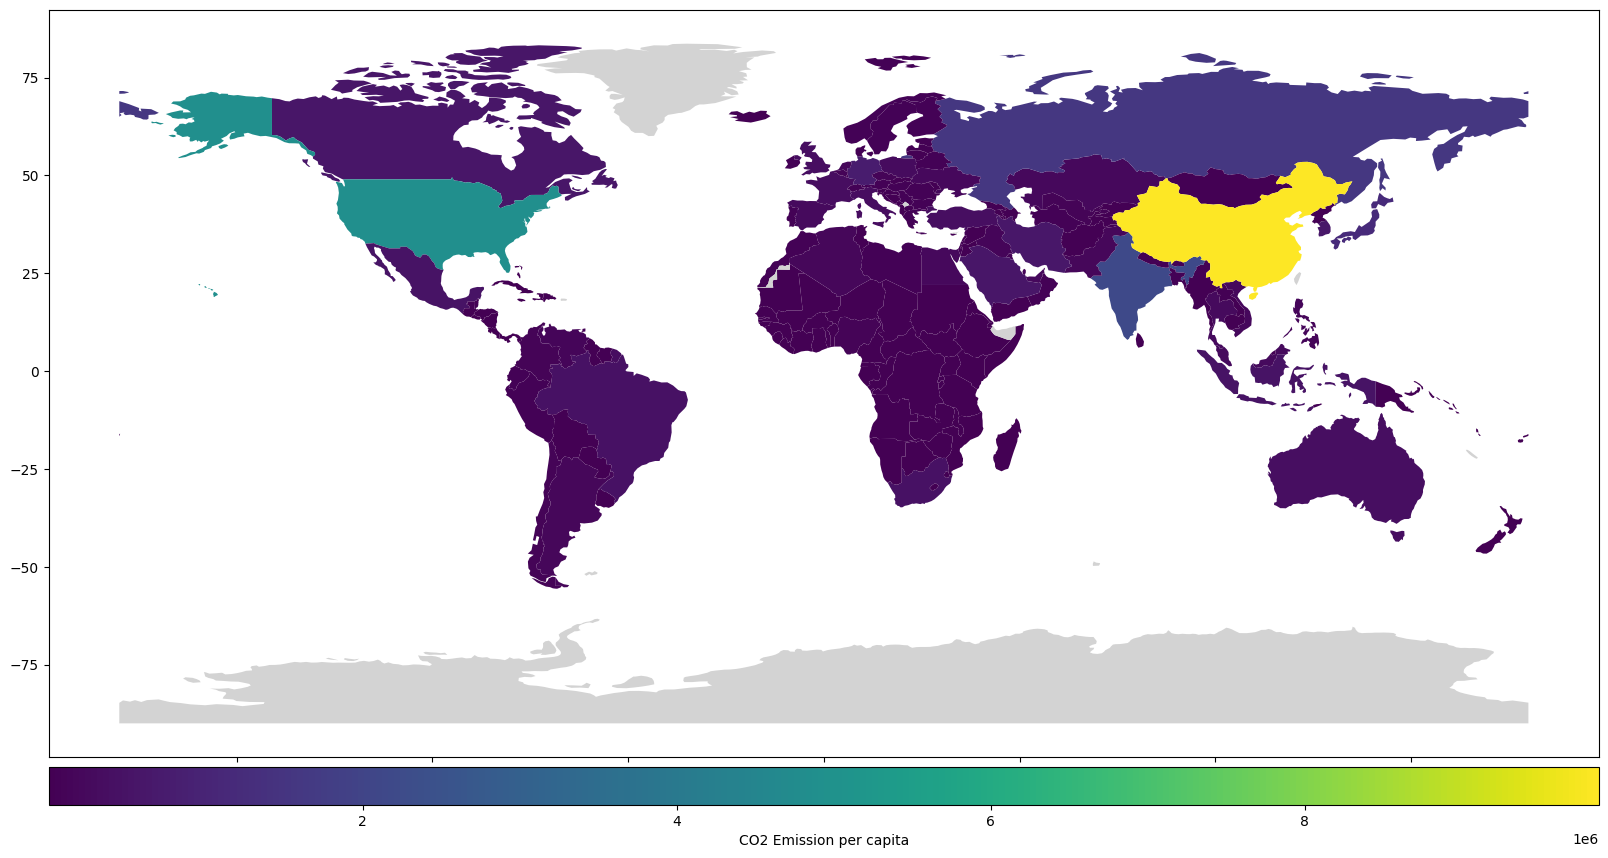

In [39]:
# World map 2016
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.grid(False)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

co2_2016 = generalDF.loc[generalDF["year"] == 2016]
world_2016 = world.merge(co2_2016,left_on='iso_a3',right_on='country_code',how='outer')
world_2016.plot(column='co2_emission', ax=ax, legend=True, cax=cax,
                legend_kwds={'label':"CO2 Emission per capita", 'orientation':"horizontal"},
                missing_kwds={'color': 'lightgrey'}, cmap = 'viridis')

## **Human Development Index (HDI)**

In [40]:
hdi_df = pd.read_csv('/Human Development Index - Full.csv.zip')

In [41]:
hdi_df

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,High,EAP,111.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,YEM,Yemen,Low,AS,183.0,0.383,0.386,0.391,0.397,0.399,...,3.66,3.60,3.55,3.39,3.48,3.06,2.84,2.89,2.89,2.89
192,ZAF,South Africa,High,SSA,109.0,0.632,0.641,0.647,0.652,0.658,...,9.55,10.09,8.41,8.06,7.55,7.76,7.60,7.55,7.55,7.55
193,ZMB,Zambia,Medium,SSA,154.0,0.412,0.408,0.408,0.414,0.411,...,4.74,4.68,3.92,3.36,3.12,3.21,2.80,2.38,2.38,2.38


In [42]:
def get_hdi(row):
  country_code = row['country_code']
  year = row['year']
  column_name = "Human Development Index (" + str(year) + ")"

  try:
    df = hdi_df[hdi_df['ISO3'] == country_code][column_name]
    return df.iloc[0]
  except:
    return None

In [43]:
generalDF['HDI'] = generalDF.apply(lambda row: get_hdi(row), axis=1)

<ipython-input-43-bc4259ab72c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generalDF['HDI'] = generalDF.apply(lambda row: get_hdi(row), axis=1)


In [44]:
generalDF

,country_code,country_name,year,gdp_per_cap,co2_emission,pop,restriction_limit,country_type,HDI
114,AFG,Afghanistan,1960,59.773234,414.371000,8620000.0,50,Low Income,NaN
115,AFG,Afghanistan,1961,59.860900,491.378000,8790000.0,50,Low Income,NaN
116,AFG,Afghanistan,1962,58.458009,689.396000,8970000.0,50,Low Income,NaN
117,AFG,Afghanistan,1963,78.706429,707.731000,9160000.0,50,Low Income,NaN
118,AFG,Afghanistan,1964,82.095307,839.743000,9360000.0,50,Low Income,NaN
...,...,...,...,...,...,...,...,...,...
15157,ZWE,Zimbabwe,2012,1304.968011,12010.000229,13300000.0,50,Lower Middle Income,0.557
15158,ZWE,Zimbabwe,2013,1429.998461,12279.999733,13600000.0,50,Lower Middle Income,0.567
15159,ZWE,Zimbabwe,2014,1434.896277,12079.999924,13900000.0,50,Lower Middle Income,0.576
15160,ZWE,Zimbabwe,2015,1445.069702,12430.000305,14200000.0,50,Lower Middle Income,0.582


## **Kyoto Protocol**

In [45]:
# Countries participated in Kyoto Protocol
kyoto = [
    "AFG", "ALB", "DZA", "AGO", "ATG", "ARG", "ARM", "AUS", "AUT", "AZE",
    "BHS", "BHR", "BGD", "BRB", "BLR", "BEL", "BLZ", "BEN", "BTN", "BOL",
    "BIH", "BWA", "BRA", "BRN", "BGR", "BFA", "BDI", "CPV", "KHM", "CMR",
    "CAF", "TCD", "CHL", "CHN", "COL", "COM", "COG", "COK", "CRI", "CIV",
    "HRV", "CUB", "CYP", "CZE", "PRK", "COD", "DNK", "DJI", "DMA", "DOM",
    "ECU", "EGY", "SLV", "GNQ", "ERI", "EST", "SWZ", "ETH", "EU", "FJI",
    "FIN", "FRA", "GAB", "GMB", "GEO", "DEU", "GHA", "GRC", "GRD", "GTM",
    "GIN", "GNB", "GUY", "HTI", "HND", "HUN", "ISL", "IND", "IDN", "IRN",
    "IRQ", "IRL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KIR",
    "KWT", "KGZ", "LAO", "LVA", "LBN", "LSO", "LBR", "LBY", "LIE", "LTU",
    "LUX", "MDG", "MWI", "MYS", "MDV", "MLI", "MLT", "MHL", "MRT", "MUS",
    "MEX", "FSM", "MCO", "MNG", "MNE", "MAR", "MOZ", "MMR", "NAM", "NRU",
    "NPL", "NLD", "NZL", "NIC", "NER", "NGA", "NIU", "MKD", "NOR", "OMN",
    "PAK", "PLW", "PAN", "PNG", "PRY", "PER", "PHL", "POL", "PRT", "QAT",
    "KOR", "MDA", "ROU", "RUS", "RWA", "KNA", "LCA", "VCT", "WSM", "SMR",
    "STP", "SAU", "SEN", "SRB", "SYC", "SLE", "SGP", "SVK", "SVN", "SLB",
    "SOM", "ZAF", "ESP", "LKA", "SDN", "SUR", "SWE", "CHE", "SYR", "TJK",
    "THA", "TLS", "TGO", "TON", "TTO", "TUN", "TUR", "TKM", "TUV", "UGA",
    "UKR", "ARE", "GBR", "TZA", "URY", "UZB", "VUT", "VEN", "VNM", "YEM",
    "ZMB", "ZWE"
]

In [46]:
def kyoto_aggrement_check(row):
  country_code = row['country_code']
  year = row['year']
  if (country_code in kyoto) and (year >= 2005 and year <= 2020):
    return 1
  else:
    return 0

In [47]:
generalDF['Kyoto Protocol'] = generalDF.apply(lambda row: kyoto_aggrement_check(row), axis=1)

<ipython-input-47-7f41e37032d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generalDF['Kyoto Protocol'] = generalDF.apply(lambda row: kyoto_aggrement_check(row), axis=1)


## **Economic Freedom Index**

In [48]:
economic_freedom_index = pd.read_csv('/efw_cc.csv')

In [49]:
economic_freedom_index[economic_freedom_index['ISO_code'] == 'ALB']

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,...,9.553657,8.963556,7.489905,10.0,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
162,2015,ALB,Albania,7.53,34.0,1.0,8.185294,7.509902,8.0,8.0,...,9.585625,8.872444,7.422175,10.0,6.155187,8.112452,7.543000,6.830576,6.733388,7.035655
324,2014,ALB,Albania,7.48,38.0,1.0,8.141176,7.442922,8.0,8.0,...,9.629320,8.973067,7.748905,10.0,6.208105,8.232519,7.236000,7.203089,6.424354,6.954481
486,2013,ALB,Albania,7.27,53.0,2.0,8.173529,7.539903,7.0,8.5,...,9.690942,8.973067,5.952681,10.0,5.897336,7.705771,6.981638,6.647075,6.244828,6.624514
648,2012,ALB,Albania,7.20,59.0,2.0,8.147059,7.611651,8.0,8.5,...,9.710740,8.964178,6.280834,10.0,3.216676,7.115422,7.055868,6.833993,5.967623,6.619162
810,2011,ALB,Albania,7.24,52.0,2.0,8.147059,7.234605,7.0,8.5,...,9.775260,8.450743,6.601293,10.0,3.423734,7.118943,7.045379,7.032871,6.062222,6.713491
972,2010,ALB,Albania,7.35,38.0,1.0,8.088235,7.386921,7.0,8.5,...,9.725022,8.450743,6.861612,10.0,3.675338,7.246924,7.038539,7.138579,6.196806,6.791308
1134,2009,ALB,Albania,7.31,39.0,2.0,9.079412,7.354223,6.0,8.5,...,9.633021,8.450743,6.899268,10.0,3.624133,7.243536,7.001459,5.943713,6.176814,6.373995
1296,2008,ALB,Albania,7.22,47.0,2.0,8.864706,9.588556,6.0,8.5,...,9.395341,8.436077,6.861160,10.0,2.109925,6.851790,6.983335,5.792607,6.116200,6.297381
1458,2007,ALB,Albania,7.21,53.0,2.0,9.035579,9.635864,8.0,8.5,...,9.424455,8.436877,6.595126,10.0,2.106612,6.784654,6.428178,5.772159,5.971135,6.057157


In [50]:
def get_economic_freedom(row):
  country_code = row['country_code']
  year = row['year']

  try:
    df = economic_freedom_index[economic_freedom_index['ISO_code'] == country_code]
    return df[df['year'] == year]['ECONOMIC FREEDOM'].iloc[0]
  except:
    return None

In [51]:
generalDF['economic_freedom'] = generalDF.apply(lambda row: get_economic_freedom(row), axis=1)

<ipython-input-51-e17432faa92a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generalDF['economic_freedom'] = generalDF.apply(lambda row: get_economic_freedom(row), axis=1)


In [57]:
generalDF

,country_code,country_name,year,gdp_per_cap,co2_emission,pop,restriction_limit,country_type,HDI,Kyoto Protocol,economic_freedom
114,AFG,Afghanistan,1960,59.773234,414.371000,8620000.0,50,Low Income,NaN,0,NaN
115,AFG,Afghanistan,1961,59.860900,491.378000,8790000.0,50,Low Income,NaN,0,NaN
116,AFG,Afghanistan,1962,58.458009,689.396000,8970000.0,50,Low Income,NaN,0,NaN
117,AFG,Afghanistan,1963,78.706429,707.731000,9160000.0,50,Low Income,NaN,0,NaN
118,AFG,Afghanistan,1964,82.095307,839.743000,9360000.0,50,Low Income,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15157,ZWE,Zimbabwe,2012,1304.968011,12010.000229,13300000.0,50,Lower Middle Income,0.557,1,5.06
15158,ZWE,Zimbabwe,2013,1429.998461,12279.999733,13600000.0,50,Lower Middle Income,0.567,1,5.30
15159,ZWE,Zimbabwe,2014,1434.896277,12079.999924,13900000.0,50,Lower Middle Income,0.576,1,5.63
15160,ZWE,Zimbabwe,2015,1445.069702,12430.000305,14200000.0,50,Lower Middle Income,0.582,1,6.01


## **Heat Map - Kendall Correlation**

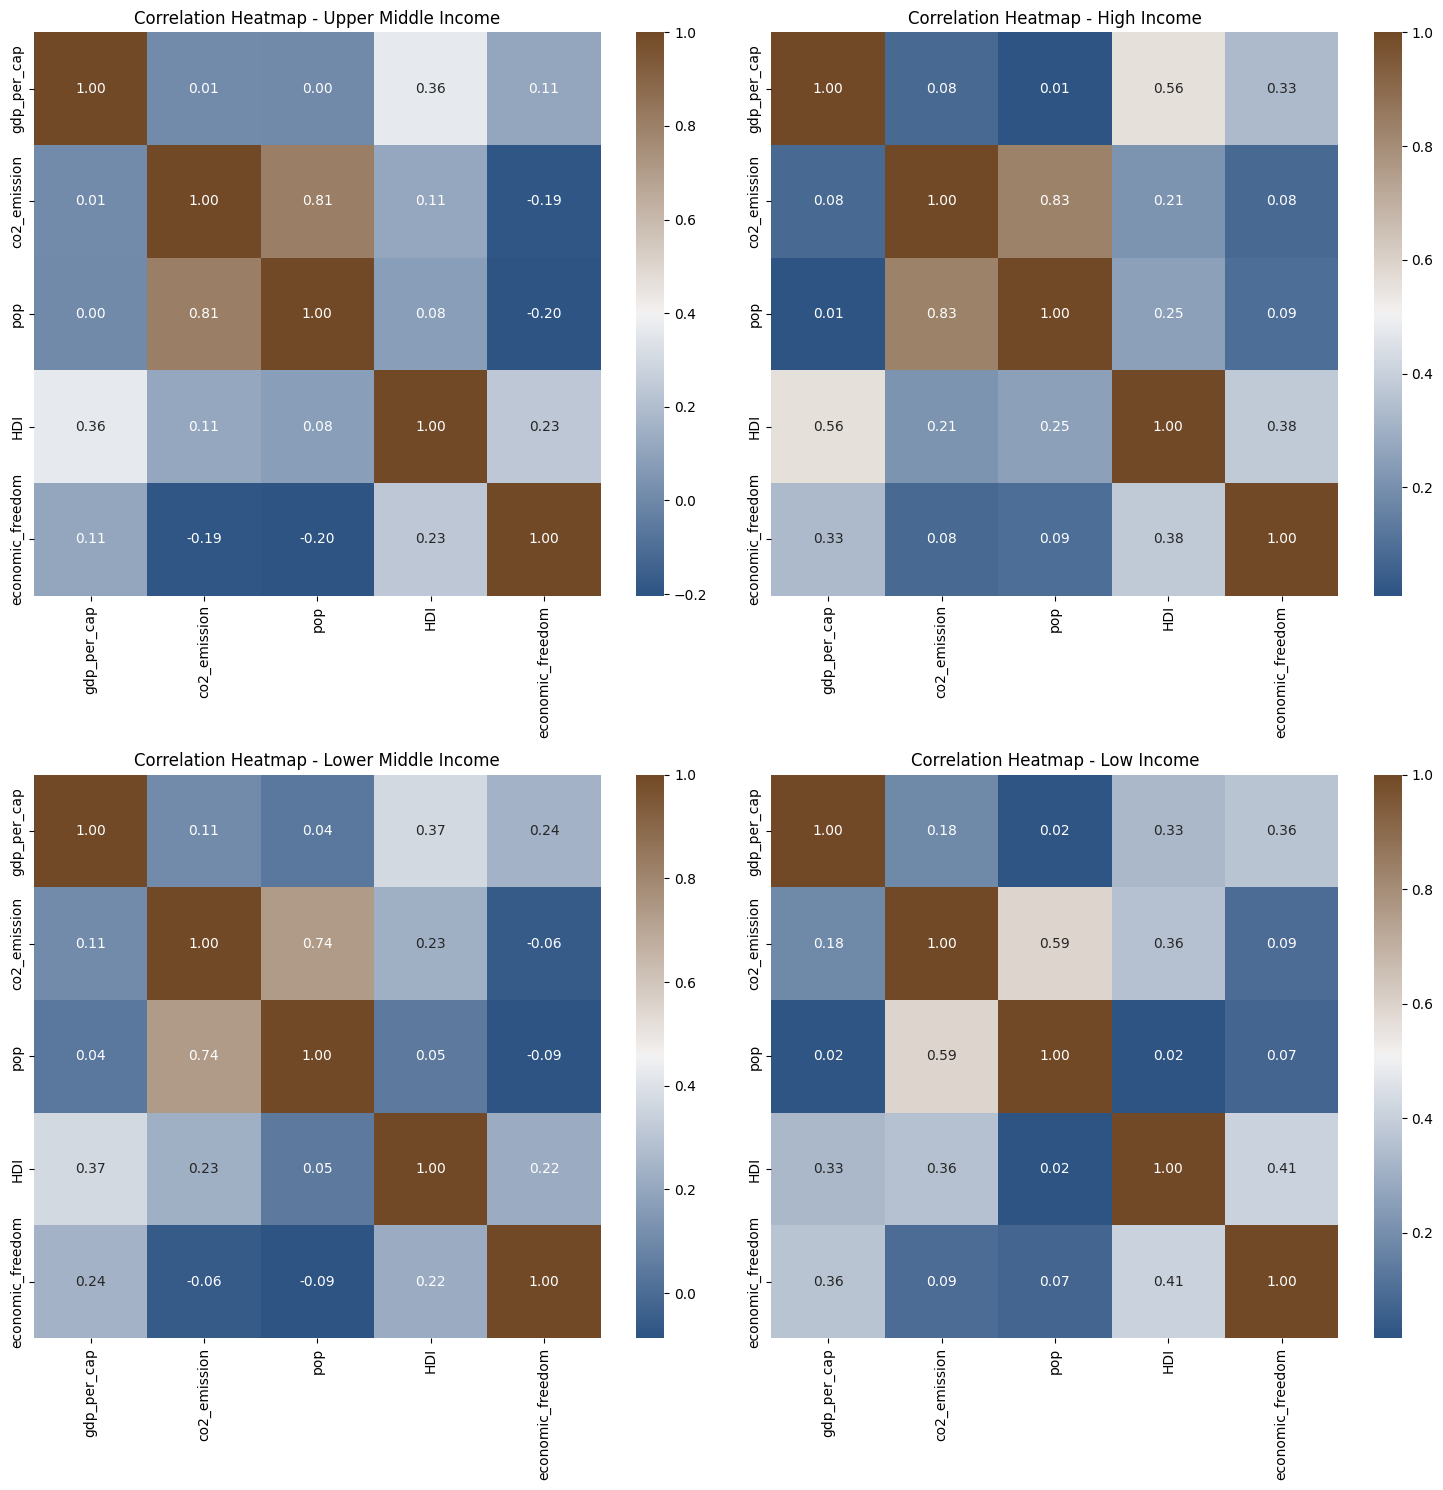

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
color=sns.diverging_palette(250, 40, l=35, center="light", as_cmap=True)

# Select columns
selected_columns = ['gdp_per_cap', 'co2_emission', 'pop', 'HDI' ,'economic_freedom']

# Define country types
country_types = ['Upper Middle Income', 'High Income', 'Lower Middle Income', 'Low Income']

# Loop through each country type and plot the heatmap
for i, country_type in enumerate(country_types):
    # Filter data for the current country type
    correlation_matrix = generalDF[generalDF['country_type'] == country_type][selected_columns].corr(method='kendall')

    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap=color, fmt=".2f", ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Correlation Heatmap - {country_type}')

plt.tight_layout()
plt.show()

## **World Total CO2 Emissions**

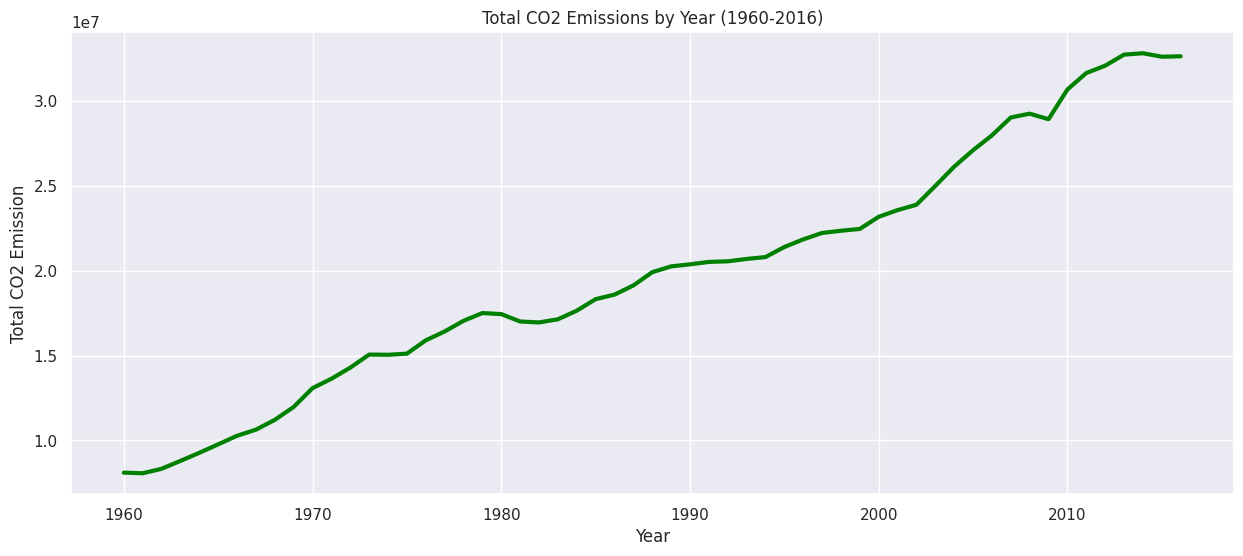

In [64]:
total_emissions_by_year = generalDF.groupby('year')['co2_emission'].sum()

# Create a line graph
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 6))
plt.plot(total_emissions_by_year.index, total_emissions_by_year.values,
         linewidth='3', color='green')
plt.title('Total CO2 Emissions by Year (1960-2016)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission')
plt.show()


## **Countries With Highest CO2 Emissions**

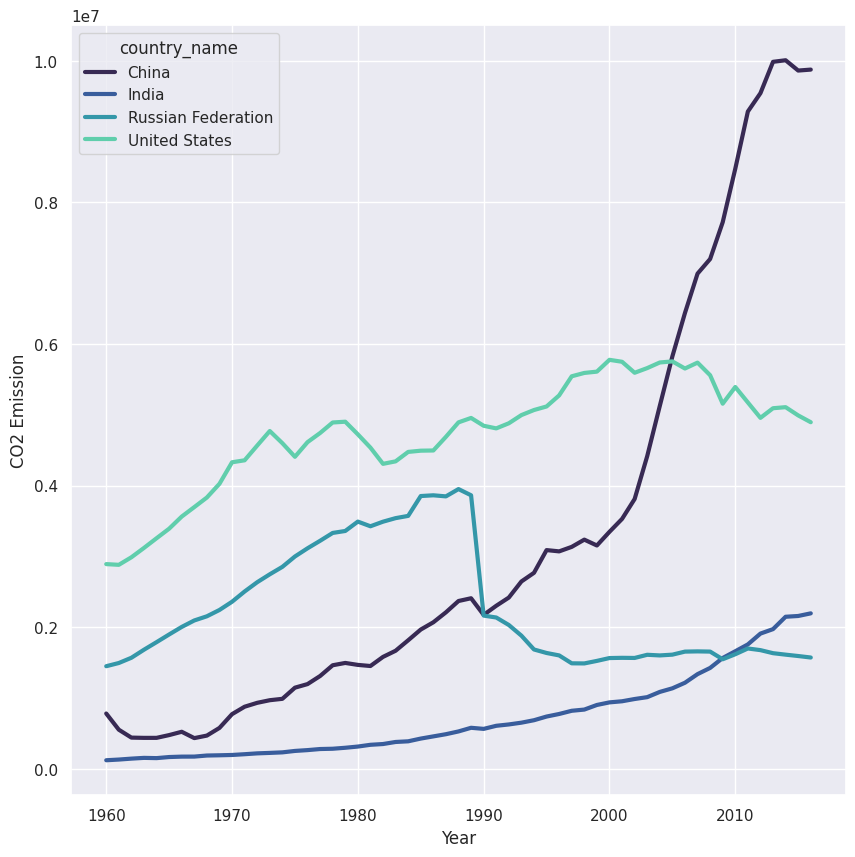

In [63]:
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(10,10)})

fig = sns.lineplot(data=generalDF[generalDF['country_code'].isin(["CHN", "IND", "RUS", "USA"])],
             x='year', y='co2_emission', hue="country_name", palette="mako",
             linewidth=3, markers=True, dashes=False)

fig.set_xlabel("Year")
fig.set_ylabel("CO2 Emission")

plt.show()

## **Environmental Aggrements**

In [65]:
#Russia
RUS_total_emissions_97_00 = generalDF[(generalDF['country_code'] == 'RUS') &
 (generalDF['year'] >= 1997) & (generalDF['year'] <= 2000)]['co2_emission'].sum()
RUS_total_emissions_01_04 = generalDF[(generalDF['country_code'] == 'RUS') &
 (generalDF['year'] >= 2001) & (generalDF['year'] <= 2004)]['co2_emission'].sum()
RUS_total_emissions_05_08 = generalDF[(generalDF['country_code'] == 'RUS') &
 (generalDF['year'] >= 2005) & (generalDF['year'] <= 2008)]['co2_emission'].sum()
RUS_total_emissions_09_12 = generalDF[(generalDF['country_code'] == 'RUS') &
 (generalDF['year'] >= 2009) & (generalDF['year'] <= 2012)]['co2_emission'].sum()
RUS_total_emissions_13_16 = generalDF[(generalDF['country_code'] == 'RUS') &
 (generalDF['year'] >= 2013) & (generalDF['year'] <= 2016)]['co2_emission'].sum()

# Denmark
DNK_total_emissions_97_00 = generalDF[(generalDF['country_code'] == 'DNK') &
 (generalDF['year'] >= 1997) & (generalDF['year'] <= 2000)]['co2_emission'].sum()
DNK_total_emissions_01_04 = generalDF[(generalDF['country_code'] == 'DNK') &
 (generalDF['year'] >= 2001) & (generalDF['year'] <= 2004)]['co2_emission'].sum()
DNK_total_emissions_05_08 = generalDF[(generalDF['country_code'] == 'DNK') &
 (generalDF['year'] >= 2005) & (generalDF['year'] <= 2008)]['co2_emission'].sum()
DNK_total_emissions_09_12 = generalDF[(generalDF['country_code'] == 'DNK') &
 (generalDF['year'] >= 2009) & (generalDF['year'] <= 2012)]['co2_emission'].sum()
DNK_total_emissions_13_16 = generalDF[(generalDF['country_code'] == 'DNK') &
 (generalDF['year'] >= 2013) & (generalDF['year'] <= 2016)]['co2_emission'].sum()

# Canada
CAN_total_emissions_97_00 = generalDF[(generalDF['country_code'] == 'CAN') &
 (generalDF['year'] >= 1997) & (generalDF['year'] <= 2000)]['co2_emission'].sum()
CAN_total_emissions_01_04 = generalDF[(generalDF['country_code'] == 'CAN') &
 (generalDF['year'] >= 2001) & (generalDF['year'] <= 2004)]['co2_emission'].sum()
CAN_total_emissions_05_08 = generalDF[(generalDF['country_code'] == 'CAN') &
 (generalDF['year'] >= 2005) & (generalDF['year'] <= 2008)]['co2_emission'].sum()
CAN_total_emissions_09_12 = generalDF[(generalDF['country_code'] == 'CAN') &
 (generalDF['year'] >= 2009) & (generalDF['year'] <= 2012)]['co2_emission'].sum()
CAN_total_emissions_13_16 = generalDF[(generalDF['country_code'] == 'CAN') &
 (generalDF['year'] >= 2013) & (generalDF['year'] <= 2016)]['co2_emission'].sum()

# Australia
AUS_total_emissions_97_00 = generalDF[(generalDF['country_code'] == 'AUS') &
 (generalDF['year'] >= 1997) & (generalDF['year'] <= 2000)]['co2_emission'].sum()
AUS_total_emissions_01_04 = generalDF[(generalDF['country_code'] == 'AUS') &
 (generalDF['year'] >= 2001) & (generalDF['year'] <= 2004)]['co2_emission'].sum()
AUS_total_emissions_05_08 = generalDF[(generalDF['country_code'] == 'AUS') &
 (generalDF['year'] >= 2005) & (generalDF['year'] <= 2008)]['co2_emission'].sum()
AUS_total_emissions_09_12 = generalDF[(generalDF['country_code'] == 'AUS') &
 (generalDF['year'] >= 2009) & (generalDF['year'] <= 2012)]['co2_emission'].sum()
AUS_total_emissions_13_16 = generalDF[(generalDF['country_code'] == 'AUS') &
 (generalDF['year'] >= 2013) & (generalDF['year'] <= 2016)]['co2_emission'].sum()

# Kazhakstan
KAZ_total_emissions_97_00 = generalDF[(generalDF['country_code'] == 'KAZ') &
 (generalDF['year'] >= 1997) & (generalDF['year'] <= 2000)]['co2_emission'].sum()
KAZ_total_emissions_01_04 = generalDF[(generalDF['country_code'] == 'KAZ') &
 (generalDF['year'] >= 2001) & (generalDF['year'] <= 2004)]['co2_emission'].sum()
KAZ_total_emissions_05_08 = generalDF[(generalDF['country_code'] == 'KAZ') &
 (generalDF['year'] >= 2005) & (generalDF['year'] <= 2008)]['co2_emission'].sum()
KAZ_total_emissions_09_12 = generalDF[(generalDF['country_code'] == 'KAZ') &
 (generalDF['year'] >= 2009) & (generalDF['year'] <= 2012)]['co2_emission'].sum()
KAZ_total_emissions_13_16 = generalDF[(generalDF['country_code'] == 'KAZ') &
 (generalDF['year'] >= 2013) & (generalDF['year'] <= 2016)]['co2_emission'].sum()

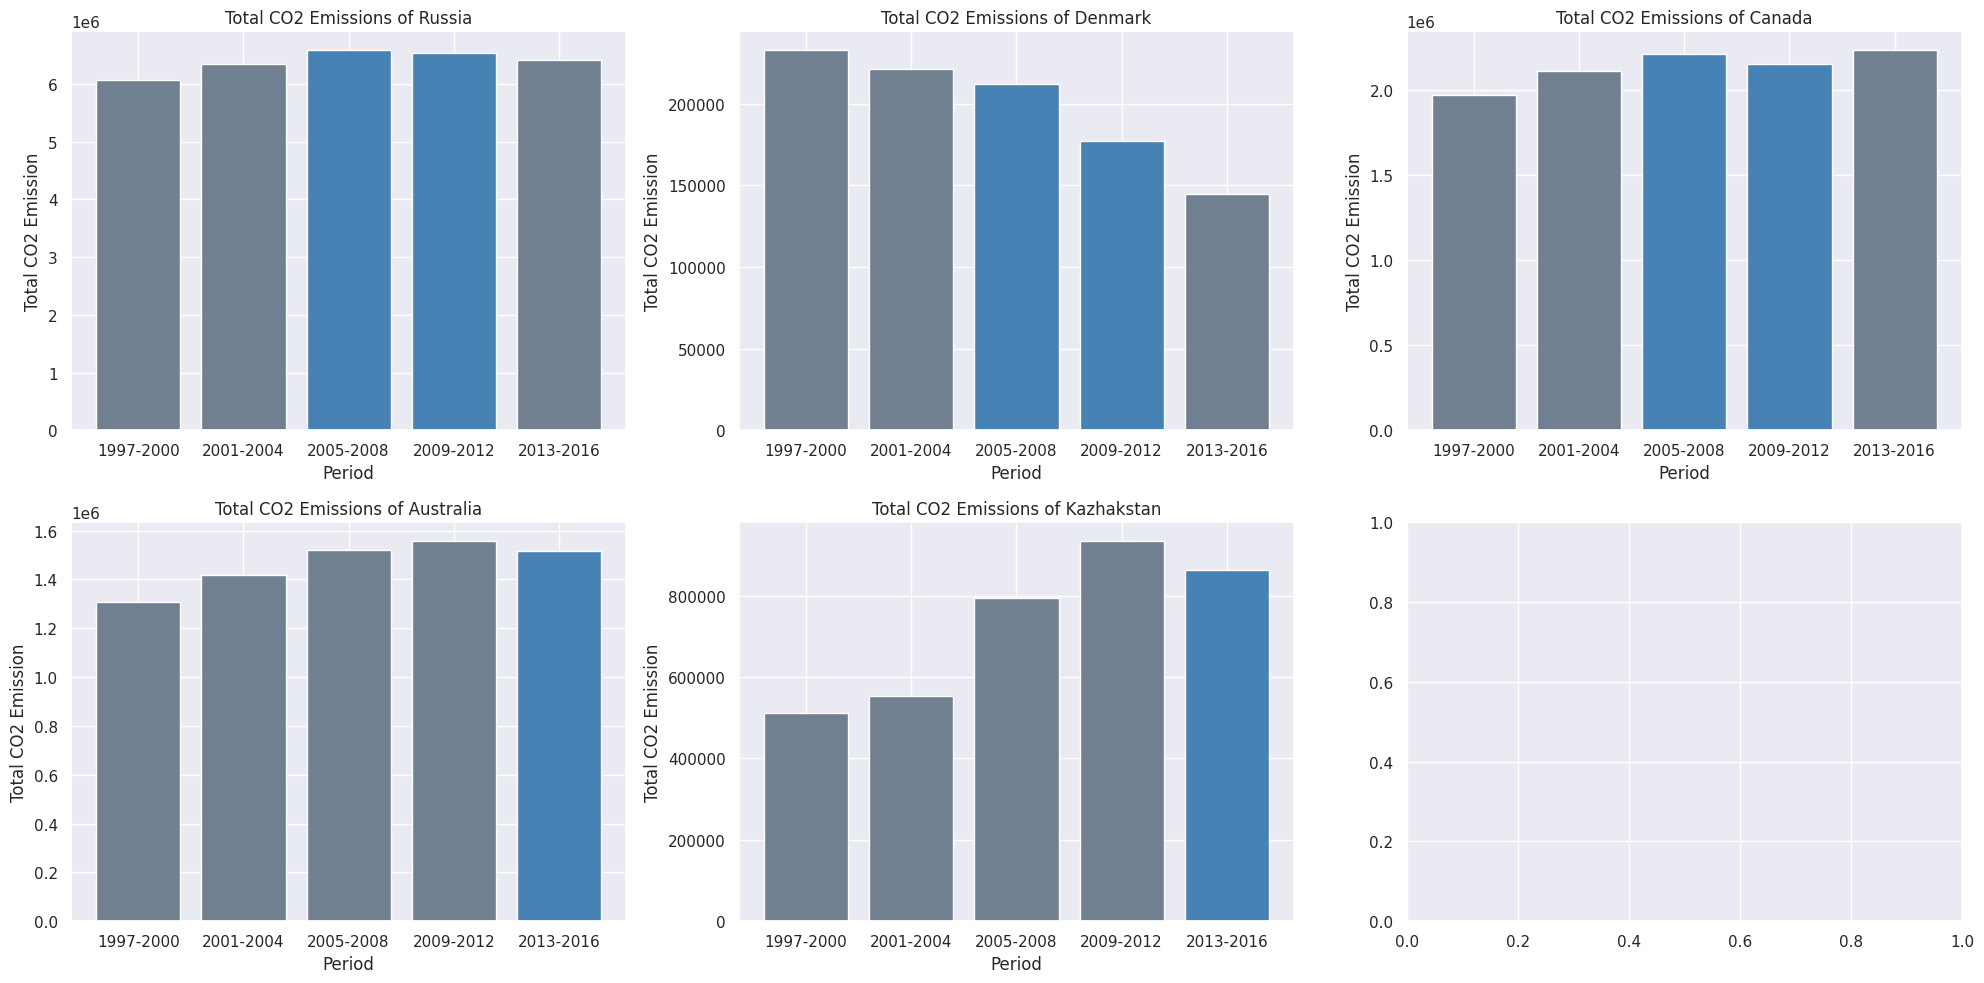

In [66]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Russia
axs[0, 0].bar(['1997-2000', '2001-2004', '2005-2008', '2009-2012', '2013-2016'],
              [RUS_total_emissions_97_00, RUS_total_emissions_01_04,
               RUS_total_emissions_05_08,
               RUS_total_emissions_09_12, RUS_total_emissions_13_16],
               color=['slategrey', 'slategrey', 'steelblue', 'steelblue',
                      'slategrey'])
axs[0, 0].set_title('Total CO2 Emissions of Russia')
axs[0, 0].set_xlabel('Period')
axs[0, 0].set_ylabel('Total CO2 Emission')

# Denmark
axs[0, 1].bar(['1997-2000', '2001-2004', '2005-2008', '2009-2012', '2013-2016'],
              [DNK_total_emissions_97_00, DNK_total_emissions_01_04,
               DNK_total_emissions_05_08,
               DNK_total_emissions_09_12, DNK_total_emissions_13_16],
               color=['slategrey', 'slategrey', 'steelblue', 'steelblue',
                      'slategrey'])
axs[0, 1].set_title('Total CO2 Emissions of Denmark')
axs[0, 1].set_xlabel('Period')
axs[0, 1].set_ylabel('Total CO2 Emission')

# Canada
axs[0, 2].bar(['1997-2000', '2001-2004', '2005-2008', '2009-2012', '2013-2016'],
              [CAN_total_emissions_97_00, CAN_total_emissions_01_04,
               CAN_total_emissions_05_08,
               CAN_total_emissions_09_12, CAN_total_emissions_13_16],
               color=['slategrey', 'slategrey', 'steelblue', 'steelblue',
                      'slategrey'])
axs[0, 2].set_title('Total CO2 Emissions of Canada')
axs[0, 2].set_xlabel('Period')
axs[0, 2].set_ylabel('Total CO2 Emission')

# Australia
axs[1, 0].bar(['1997-2000', '2001-2004', '2005-2008', '2009-2012', '2013-2016'],
              [AUS_total_emissions_97_00, AUS_total_emissions_01_04,
               AUS_total_emissions_05_08,
               AUS_total_emissions_09_12, AUS_total_emissions_13_16],
               color=['slategrey', 'slategrey', 'slategrey', 'slategrey',
                      'steelblue'])
axs[1, 0].set_title('Total CO2 Emissions of Australia')
axs[1, 0].set_xlabel('Period')
axs[1, 0].set_ylabel('Total CO2 Emission')

# Kazhakstan
axs[1, 1].bar(['1997-2000', '2001-2004', '2005-2008', '2009-2012', '2013-2016'],
              [KAZ_total_emissions_97_00, KAZ_total_emissions_01_04,
               KAZ_total_emissions_05_08,
               KAZ_total_emissions_09_12, KAZ_total_emissions_13_16],
               color=['slategrey', 'slategrey', 'slategrey', 'slategrey',
                      'steelblue'])
axs[1, 1].set_title('Total CO2 Emissions of Kazhakstan')
axs[1, 1].set_xlabel('Period')
axs[1, 1].set_ylabel('Total CO2 Emission')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# **Predictions**

### **LSTM Model**

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [68]:
tf.random.set_seed(7)

In [70]:
dataset = []

for year in range(1960, 2017):
  print(generalDF[generalDF['year'] == year]['co2_emission'].dropna().values.sum())
  x = generalDF[generalDF['year'] == year]['co2_emission'].dropna().values.sum()

  dataset.append([x])

8107106.276000001
8071474.0370000005
8334258.591000001
8799406.540000001
9274462.723000001
9775360.254999999
10277739.255
10638381.371000001
11216131.889
11975079.877999999
13084706.744
13635537.815
14291351.428999998
15059954.629
15046236.382000001
15113551.501000002
15897134.396000002
16420162.272999998
17047347.617999997
17504981.884
17441953.488
17006658.586000003
16951066.866
17136811.416999996
17643810.837
18322744.886
18587725.972999997
19130650.992
19909554.794999998
20252140.603
20372745.9
20514853.016999997
20549821.425
20689979.93
20800591.265
21392536.28
21841851.075
22219559.203
22349324.354000002
22457844.674000002
23171980.827
23564136.573
23880981.49040155
24989848.719439253
26122664.88838666
27092164.954856545
27966523.203285106
29019756.440984003
29242675.298144653
28917505.311532818
30668182.153091457
31635977.28459117
32068841.273678955
32720845.800141506
32800727.734460562
32597333.700277068
32621269.18684681


In [71]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [72]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

38 19


In [73]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [74]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [75]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [76]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
36/36 - 3s - loss: 0.1129 - 3s/epoch - 80ms/step
Epoch 2/100
36/36 - 0s - loss: 0.0828 - 150ms/epoch - 4ms/step
Epoch 3/100
36/36 - 0s - loss: 0.0599 - 150ms/epoch - 4ms/step
Epoch 4/100
36/36 - 0s - loss: 0.0434 - 172ms/epoch - 5ms/step
Epoch 5/100
36/36 - 0s - loss: 0.0321 - 133ms/epoch - 4ms/step
Epoch 6/100
36/36 - 0s - loss: 0.0252 - 163ms/epoch - 5ms/step
Epoch 7/100
36/36 - 0s - loss: 0.0215 - 169ms/epoch - 5ms/step
Epoch 8/100
36/36 - 0s - loss: 0.0192 - 158ms/epoch - 4ms/step
Epoch 9/100
36/36 - 0s - loss: 0.0182 - 170ms/epoch - 5ms/step
Epoch 10/100
36/36 - 0s - loss: 0.0172 - 158ms/epoch - 4ms/step
Epoch 11/100
36/36 - 0s - loss: 0.0165 - 154ms/epoch - 4ms/step
Epoch 12/100
36/36 - 0s - loss: 0.0159 - 176ms/epoch - 5ms/step
Epoch 13/100
36/36 - 0s - loss: 0.0152 - 163ms/epoch - 5ms/step
Epoch 14/100
36/36 - 0s - loss: 0.0147 - 223ms/epoch - 6ms/step
Epoch 15/100
36/36 - 0s - loss: 0.0139 - 155ms/epoch - 4ms/step
Epoch 16/100
36/36 - 0s - loss: 0.0134 - 98ms/epoch

In [77]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1/1 [==============================] - 0s 68ms/step
Train Score: 337987.84 RMSE
Test Score: 1113517.21 RMSE


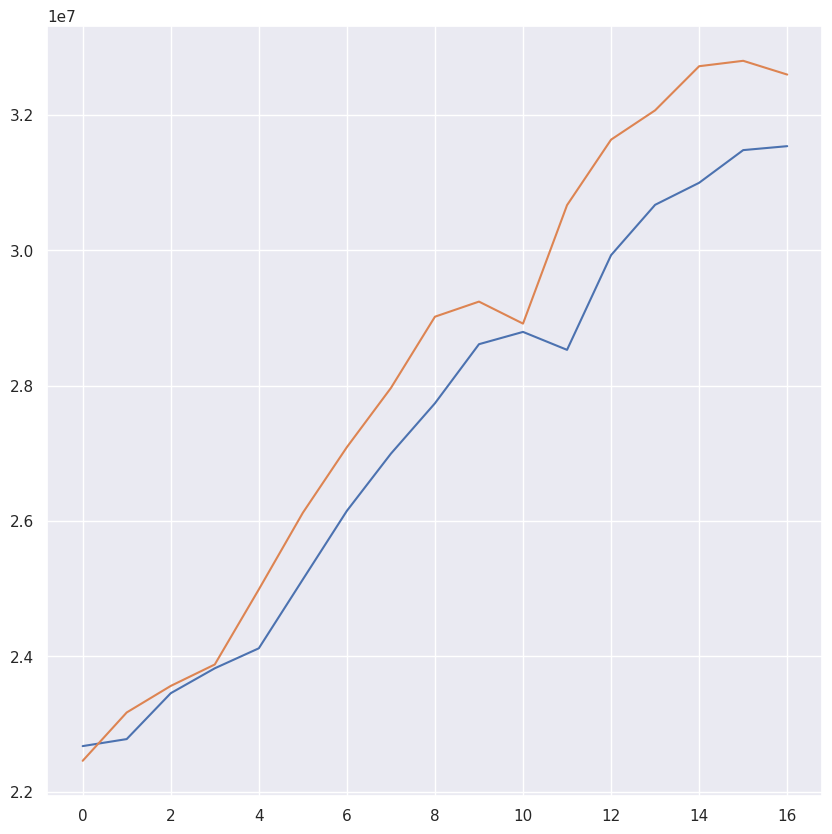

In [78]:
plt.plot(testPredict)
plt.plot(testY[0])
plt.show()

In [79]:
testY

array([[22457844.67400001, 23171980.827     , 23564136.573     ,
        23880981.49040155, 24989848.71943925, 26122664.88838666,
        27092164.95485654, 27966523.2032851 , 29019756.440984  ,
        29242675.29814465, 28917505.31153282, 30668182.15309146,
        31635977.28459117, 32068841.27367895, 32720845.80014151,
        32800727.73446056, 32597333.70027706]])

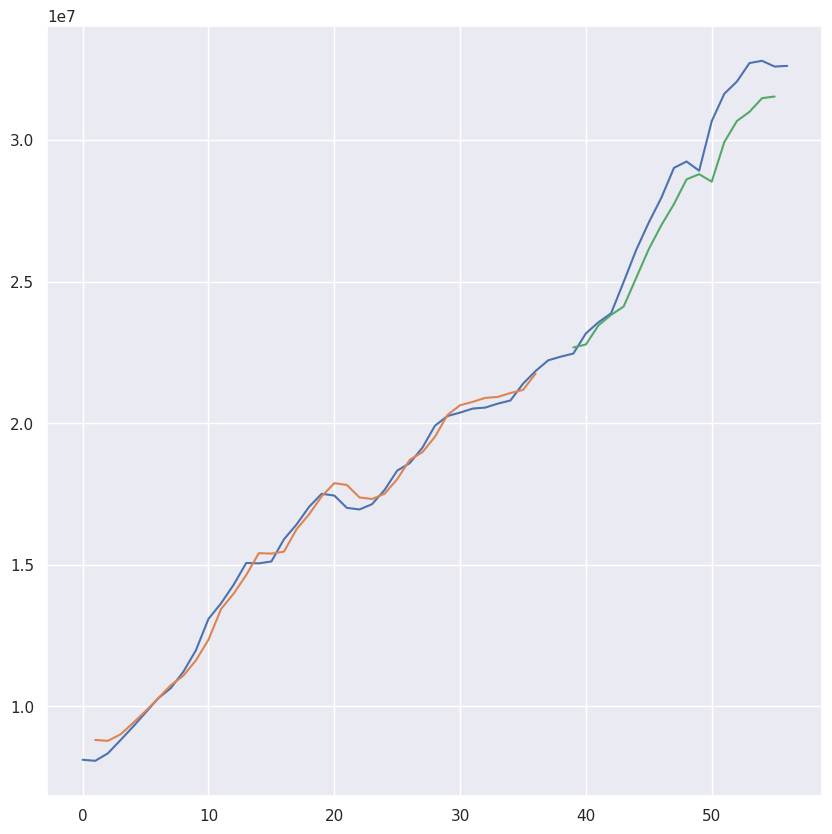

In [80]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

[[0.59053755]
 [0.5947341 ]
 [0.6221399 ]
 [0.63702804]
 [0.64897025]
 [0.6901273 ]
 [0.7311031 ]
 [0.7652747 ]
 [0.7953647 ]
 [0.8306784 ]
 [0.8380211 ]
 [0.827295  ]
 [0.8838865 ]
 [0.9139537 ]
 [0.9271231 ]
 [0.94663686]
 [0.949001  ]]
1/1 [==============================] - ETA: 0s

<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 69ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 64ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - ETA: 0s

<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 107ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 74ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 77ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 82ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 110ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 92ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 246ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 164ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 347ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 318ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 277ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 202ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 93ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 102ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 189ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 389ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 297ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 314ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 181ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 66ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 170ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 94ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 71ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 66ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 45ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 68ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 73ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 46ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 48ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 46ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 58ms/step


<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])
<ipython-input-81-6682fa540f04>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = model.predict([[[float(x)]]])


1/1 [==============================] - 0s 49ms/step
[30599752.0, 29875946.0, 29304736.0, 28845462.0, 28470768.0, 28161500.0, 27903822.0, 27687464.0, 27504640.0, 27349324.0, 27216786.0, 27103258.0, 27005698.0, 26921628.0, 26849018.0, 26786172.0, 26731688.0, 26684382.0, 26643250.0, 26607452.0, 26576264.0, 26549062.0, 26525328.0, 26504604.0, 26486496.0, 26470668.0, 26456828.0, 26444716.0, 26434120.0, 26424842.0, 26416720.0, 26409610.0, 26403380.0, 26397922.0, 26393140.0, 26388948.0, 26385278.0, 26382058.0, 26379234.0, 26376760.0, 26374594.0, 26372692.0, 26371026.0, 26369568.0, 26368286.0, 26367160.0, 26366172.0, 26365308.0, 26364550.0, 26363884.0]


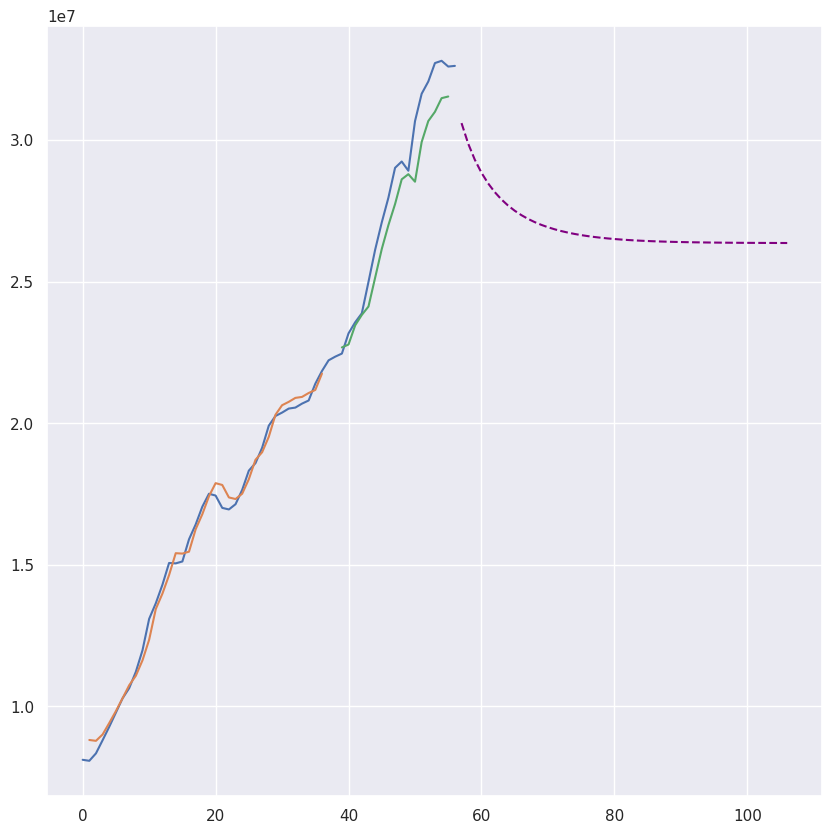

In [81]:
print(scaler.transform(testPredict))

num_years = 50

x = scaler.transform(testPredict)[-1][0]
future_predictions = []

for i in range(num_years):
  x = model.predict([[[float(x)]]])
  future_predictions.append(scaler.inverse_transform(x)[0][0])

# Future prediction
print(future_predictions)
future_years_plot = np.arange(len(dataset), len(dataset) + num_years)
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.plot(future_years_plot, future_predictions, label='Future Predictions', color='purple', linestyle='--')
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]

### **Correlation Models**

In [96]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.0 MB/s eta 0:00:00


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import lightgbm
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import warnings
from sklearn.exceptions import DataConversionWarning

In [83]:
def pop_predictor(country_code, to_year, restriction_limit):
  country_df = generalDF[generalDF['country_code'] == country_code]

  X = country_df[['year','restriction_limit']]
  Y = country_df['pop']

  regressor = LinearRegression()
  regressor.fit(X, Y)

  array = []

  for year in range(2017, to_year):
    array.append([year, restriction_limit])

  pop_in_year = regressor.predict(array)

  return pop_in_year

In [85]:
pop_predictor('AUS', 2050, generalDF[(generalDF['year'] == 2016) & (generalDF['country_code'] == 'AUS')]['restriction_limit'].iloc[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23409022.556391  , 23641820.06740993, 23874617.57842886,
       24107415.08944774, 24340212.60046667, 24573010.1114856 ,
       24805807.62250453, 25038605.13352346, 25271402.6445424 ,
       25504200.15556133, 25736997.66658026, 25969795.17759919,
       26202592.68861812, 26435390.19963706, 26668187.71065599,
       26900985.22167486, 27133782.73269379, 27366580.24371272,
       27599377.75473166, 27832175.26575059, 28064972.77676952,
       28297770.28778845, 28530567.79880738, 28763365.30982631,
       28996162.82084525, 29228960.33186418, 29461757.84288305,
       29694555.35390198, 29927352.86492091, 30160150.37593985,
       30392947.88695878, 30625745.39797771, 30858542.90899664])

In [87]:
country_codes = generalDF['country_code'].unique();

In [88]:
country_codes

array(['AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS',
       'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR',
       'BHS', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN',
       'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD',
       'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU',
       'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP',
       'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FSM', 'GAB', 'GBR', 'GEO',
       'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY',
       'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN',
       'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN',
       'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR',
       'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR',
       'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT',
       'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM',
       'NER', 'NGA',

In [90]:
future_pop_prediction = {}
for country in country_codes:
  future_pop_prediction[country] = pop_predictor(country, 2050, generalDF[(generalDF['year'] == 2016) & (generalDF['country_code'] == country)]['restriction_limit'].iloc[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [91]:
future_pop_prediction

{'AFG': array([28325119.04761899, 28739536.34085202, 29153953.63408518,
        29568370.92731822, 29982788.22055137, 30397205.51378441,
        30811622.80701745, 31226040.1002506 , 31640457.39348364,
        32054874.68671679, 32469291.97994983, 32883709.27318287,
        33298126.56641603, 33712543.85964906, 34126961.1528821 ,
        34541378.44611526, 34955795.73934829, 35370213.03258145,
        35784630.32581449, 36199047.61904752, 36613464.91228068,
        37027882.20551372, 37442299.49874687, 37856716.79197991,
        38271134.08521295, 38685551.3784461 , 39099968.67167914,
        39514385.96491218, 39928803.25814533, 40343220.55137837,
        40757637.84461153, 41172055.13784456, 41586472.4310776 ]),
 'AGO': array([24625889.72431087, 25028536.8593899 , 25431183.99446905,
        25833831.12954807, 26236478.2646271 , 26639125.39970624,
        27041772.53478527, 27444419.66986442, 27847066.80494344,
        28249713.94002259, 28652361.07510161, 29055008.21018064,
        2

In [92]:
data = generalDF[['pop','co2_emission','year']]

In [93]:
data

,pop,co2_emission,year
114,8620000.0,414.371000,1960
115,8790000.0,491.378000,1961
116,8970000.0,689.396000,1962
117,9160000.0,707.731000,1963
118,9360000.0,839.743000,1964
...,...,...,...
15157,13300000.0,12010.000229,2012
15158,13600000.0,12279.999733,2013
15159,13900000.0,12079.999924,2014
15160,14200000.0,12430.000305,2015


In [94]:
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size

In [98]:
data = shuffle(data)
data.dropna(subset=['co2_emission'], inplace=True)

dtrain = data.iloc[:train_size,:]
dtest = data.iloc[train_size:,:]

In [99]:
br_params = {
    'n_iter': 304,
    'tol': 0.16864712769300896,
    'alpha_1': 5.589616542154059e-07,
    'alpha_2': 9.799343618469923,
    'lambda_1': 1.7735725582463822,
    'lambda_2': 3.616928181181732e-06
}

lightgbm_params = {
    'num_leaves': 39,
    'max_depth': 2,
    'learning_rate': 0.13705339989856127,
    'n_estimators': 273
}

ridge_params = {
    'alpha': 631.1412445239156
}
models = {'gbr':GradientBoostingRegressor(),
          'br':BayesianRidge(**br_params),
          'ridge':Ridge(**ridge_params),
          'lgbm':LGBMRegressor(**lightgbm_params),
          'random_forest':RandomForestRegressor(),
          'catboost':CatBoostRegressor(loss_function='RMSE',n_estimators=15000, verbose = 0)
}

In [100]:
for name, model in models.items():
  model.fit(dtrain[['pop','year']], dtrain['co2_emission'])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 7447, number of used features: 2
[LightGBM] [Info] Start training from score 113080.035476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [101]:
y_pred_test = {}

for name, model in models.items():
  y_pred_test[name] = model.predict(dtest[['pop','year']])

In [102]:
for name, model in models.items():
  testScore = np.sqrt(mean_squared_error(dtest['co2_emission'], y_pred_test[name]))
  print('Model',name,':',testScore)

Model gbr : 207497.0804414642
Model br : 427536.9325955752
Model ridge : 427449.13005754666
Model lgbm : 274387.8606540036
Model random_forest : 208031.14537056262
Model catboost : 431693.19911675336


In [103]:
y_pred_test['ridge']

array([ 53005.36030787,  77861.81578985,  69177.19054405, ...,
        58925.39668451, 113134.83318621,  37683.28354619])

In [106]:
# Filter out warnings from scikit-learn
warnings.filterwarnings("ignore", category=UserWarning)

prediction = {}

for name, model in models.items():
  data_predict = []
  for year in range(1960, 2017):
    sum_co2_predict = 0

    for country in country_codes:
      pop = generalDF[(generalDF['country_code'] == country) & (generalDF['year'] == year)]['pop'].iloc[0]

      co2_predict = model.predict([[pop, year]])[0]
      sum_co2_predict += co2_predict

    data_predict.append([sum_co2_predict])

  for year in range(2017, 2050):
    i = year - 2017

    sum_co2_predict = 0

    for country in country_codes:
      pop = future_pop_prediction[country][i]

      co2_predict = model.predict([[pop, year]])[0]
      sum_co2_predict += co2_predict

    data_predict.append([sum_co2_predict])

  prediction[name] = data_predict

print(prediction)

{'gbr': [[8456969.19182241], [8881494.839683857], [9548290.417839479], [10663651.913555786], [11052429.329421788], [11266524.292794993], [11468412.12616929], [11601956.113856187], [11994503.624768645], [12577512.56584195], [14639002.55009478], [14976030.443444476], [14924736.510495257], [15786594.812199641], [15607332.59555321], [15808339.979102226], [16286139.70199416], [17533941.73366142], [18217145.01726027], [17818433.136851344], [17720644.232289534], [17889794.462717816], [18185761.317332424], [18536449.13021213], [18456898.4011719], [19823132.945947148], [20907561.155198347], [18574351.31073265], [20218572.87156256], [20613470.05844059], [20102412.26960479], [20411567.280102737], [19875248.62138785], [20749928.685693838], [18552591.482627872], [20931995.56531894], [21985170.34257888], [23006257.24486918], [24116191.57459254], [22894332.976887893], [22822705.264765423], [24882221.89803977], [24313642.758583933], [23061443.82301594], [25522976.98367737], [27367241.5839953], [284617

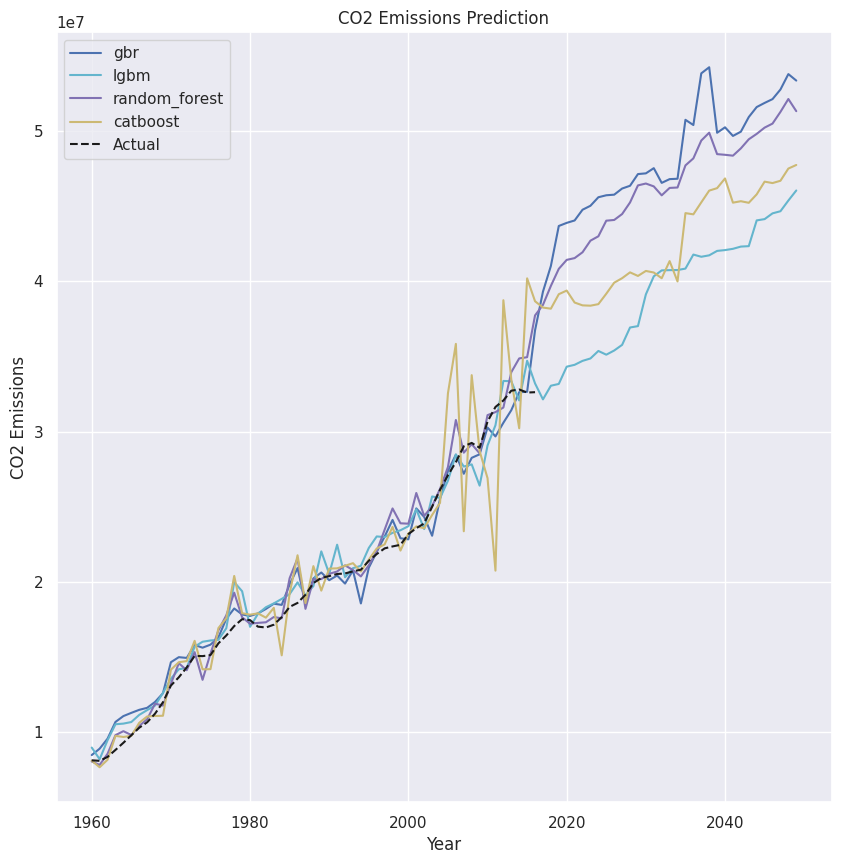

In [108]:
# Future prediction
dataset = []

for year in range(1960, 2017):
    x = generalDF[generalDF['year'] == year]['co2_emission'].dropna().values.sum()
    dataset.append([x])

# Define a color scheme
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, (name, model) in enumerate(models.items()):
  if name != "br" and name != "ridge":
    plt.plot(range(1960, 2050), prediction[name], label=name, color=colors[i % len(colors)])

plt.plot(range(1960, 2017), dataset, label='Actual', color='k', linestyle='--')

# Add legend
plt.legend()

plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Prediction')

plt.show()